# Beholder

Analisaremos por teste de hipótese o famoso experimento de comprovação da teoria da relatividade de Einstein. Foi visto a posição de estrelas durante um eclipse solar.

Para isso, admitimos que o deslocamento angular segue uma distribuição normal com média 1.75 e variância 0.02.

Para o experimento, usaremos nível de confiança de 95%.

In [1]:
NIVEL_DE_CONFIANCIA = 0.95
significância = 1 - NIVEL_DE_CONFIANCIA

Além disso, usaremos p-valor para testar a hipótese

In [2]:
def conclusao(pvalor, significancia):

    print("p-valor =", pvalor)

    print()

    if pvalor < significancia:
        print("Conclusão do teste de hipótese: \033[31mdevemos rejeitar H0\033[0m")
    else:
        print("Conclusão do teste de hipótese: \x1b[32mnão devemos rejeitar H0\x1b[0m")

Usarei $H_0$ como a hipótese de que a diferença obtida foi fruto do acaso, enquanto $H_1$ que o deslocamento angular não seguiu o proposto por Einstein. Esse é um exemplo de hipótese bilateral.

Façamos agora simulações para o problema proposto:

Primeiramente, definimos as constantes a serem utilizadas

In [3]:
#Definindo as constantes:
u = 1.75
var = 0.02
sigma = (var) ** 0.5
observado = 1.98
N_SIMULACOES = 1000000

Depois rodamos 1000000 simulações obtendo valores em distribuição normal

In [4]:
import numpy as np
sims = np.random.normal(u, sigma, size=N_SIMULACOES)  

Visualizemos graficamente o obtido

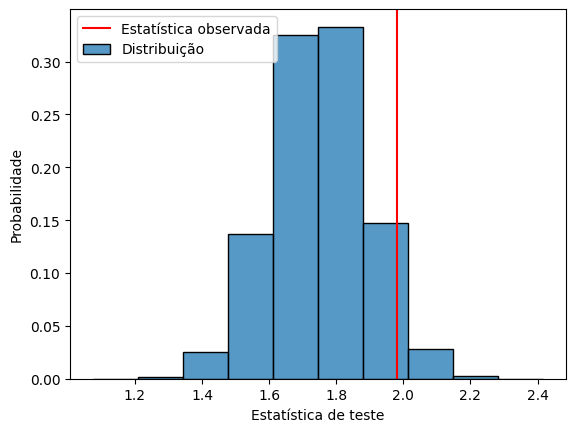

In [5]:
import seaborn as sns

eixo = sns.histplot(
    sims,
    stat="probability",
    bins=10,
    label="Distribuição",
)

eixo.axvline(observado, label="Estatística observada", color="red")
eixo.set(xlabel="Estatística de teste", ylabel="Probabilidade")
eixo.legend();

Agora calculamos p_value

In [6]:
stat_obs = abs(1.98 - u)
k = 0
j = 0
for i in range(N_SIMULACOES):
    if (abs(sims[i] - u) >= stat_obs):
        k += 1
    else:
        j += 1
p_valor = k/N_SIMULACOES
print(k/N_SIMULACOES)
print(j/N_SIMULACOES)

0.103882
0.896118


Usamos por fim a função conclusão anteriormente feita

In [7]:
conclusao(p_valor, significância)

p-valor = 0.103882

Conclusão do teste de hipótese: não devemos rejeitar H0


Portanto, o p_valor estava bem próximo da significância, porém ainda obtemos o resultado que não podemos rejeitar $H_0$. Logo, os valores obtidos no experimento apontam para a validação da teoria proposta por Einstein da relatividade.

### Referências

LMA-203 9.0 - Introdução aos testes de hipótese

LMA-203 A.0 - Explorando diferentes testes de hipóteses